In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
csv_folder = "/Users/onurserce/Desktop/"

dataframes = []

for file in os.listdir(csv_folder):
    if file.endswith(".csv"):
        print("appending", file)
        file_df = pd.read_csv(csv_folder+file, index_col=0)
        file_df["model"] = file.split("_")[1]
        if "200000" not in file:
            dataframes.append(file_df)
        
df = pd.concat(dataframes, axis=0, ignore_index=True)

#df = df.sort_values(by=" Test error(px)", ascending=True)
df = df.sort_values(by="Test error with p-cutoff", ascending=True)
df = df[(df["Training iterations:"] != 50000) & (df["Training iterations:"] != 201000)]

df.head(10)

appending DLC_resnet50_dlc_realApr6shuffle2_250000-results.csv


,Training iterations:,%Training dataset,Shuffle number,Train error(px),Test error(px),p-cutoff used,Train error with p-cutoff,Test error with p-cutoff,model
4,250000,90,2,20.87,16.53,0.85,7.22,6.61,resnet50
3,200000,90,2,20.60,16.58,0.85,7.07,6.62,resnet50
2,150000,90,2,21.08,16.58,0.85,7.06,6.64,resnet50
1,100000,90,2,22.34,16.48,0.85,7.83,6.66,resnet50


In [3]:
df.drop(df.columns[[1, 3, 5, 6]], axis=1).groupby(["Shuffle number", "Training iterations:"]).describe()

Test error(px)                           \
                                              count   mean std    min    25%   
Shuffle number Training iterations:                                            
2              100000                           1.0  16.48 NaN  16.48  16.48   
               150000                           1.0  16.58 NaN  16.58  16.58   
               200000                           1.0  16.58 NaN  16.58  16.58   
               250000                           1.0  16.53 NaN  16.53  16.53   

                                                          \
                                       50%    75%    max   
Shuffle number Training iterations:                        
2              100000                16.48  16.48  16.48   
               150000                16.58  16.58  16.58   
               200000                16.58  16.58  16.58   
               250000                16.53  16.53  16.53   

                                    Test error with p-cutoff                  \
                                                       count  mean std   min   
Shuffle number Training iterations:                                            
2              100000                                    1.0  6.66 NaN  6.66   
               150000                                    1.0  6.64 NaN  6.64   
               200000                                    1.0  6.62 NaN  6.62   
               250000                                    1.0  6.61 NaN  6.61   

                                                             
                                      25%   50%   75%   max  
Shuffle number Training iterations:                          
2              100000                6.66  6.66  6.66  6.66  
               150000                6.64  6.64  6.64  6.64  
               200000                6.62  6.62  6.62  6.62  
               250000                6.61  6.61  6.61  6.61

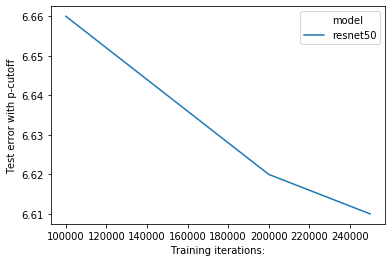

In [23]:
sns.lineplot(data=df, x="Training iterations:", y="Test error with p-cutoff", hue="model", style="model")

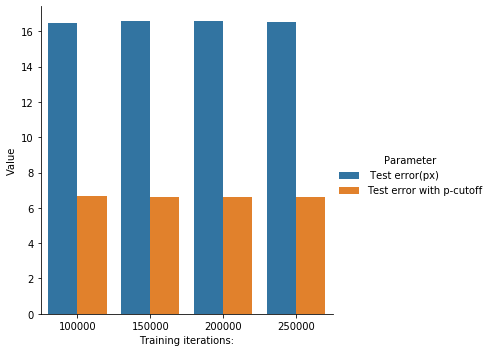

In [32]:
melted_df = pd.melt(df, id_vars=['Training iterations:'], value_vars=[' Test error(px)', 'Test error with p-cutoff'],
       var_name='Parameter', value_name='Value')

sns.catplot(data=melted_df, x="Training iterations:", y="Value", hue="Parameter", kind='bar')

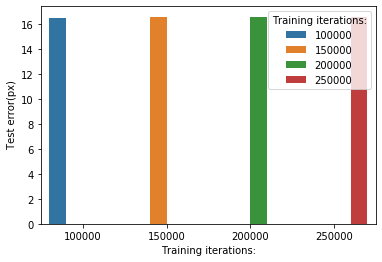

In [33]:
sns.barplot(data=df, y=" Test error(px)", x="Training iterations:", hue="Training iterations:")

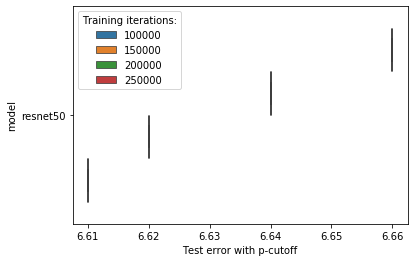

In [34]:
sns.boxplot(data=df, x="Test error with p-cutoff", y="model", hue="Training iterations:")

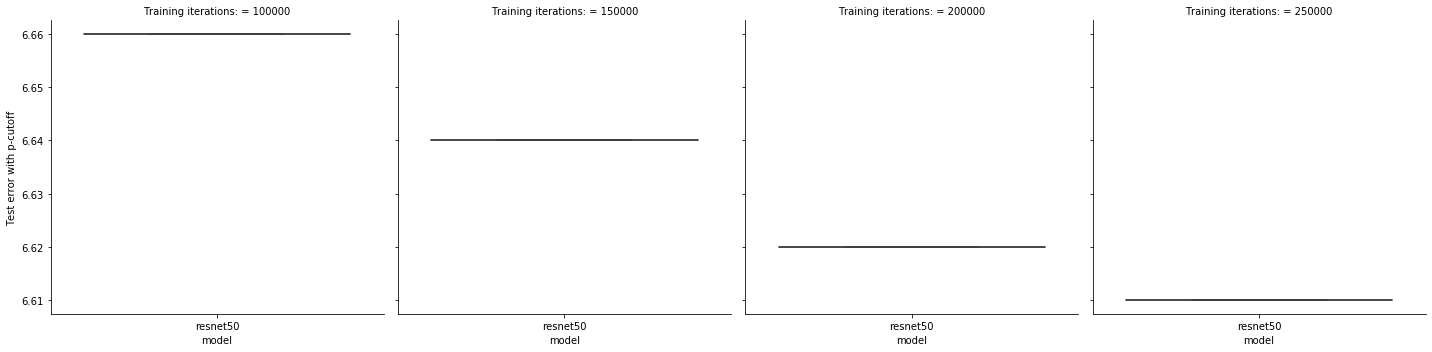

In [35]:
sns.catplot(data=df, y="Test error with p-cutoff", x="model", col="Training iterations:", kind="box")

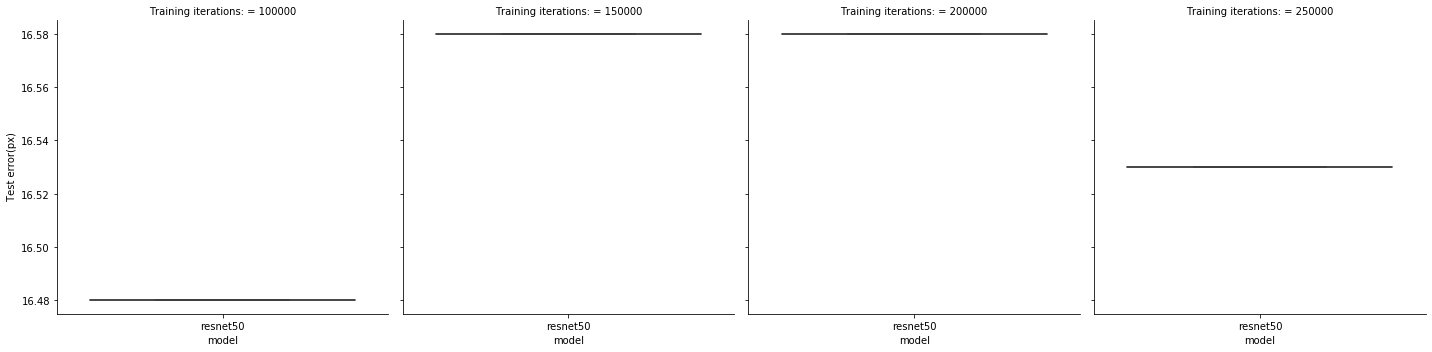

In [36]:
sns.catplot(data=df, y=" Test error(px)", x="model", col="Training iterations:", kind="box")

## Conclusion:

resnet50 performs the worst
resnet152 shuffle number 32 looks like an outlier.

**the most logical thing might be to proceed with the outlier extraction with all 3 shuffles of resnet152 and resnet101 models**